In [27]:
import pandas as pd
import numpy as np
from datetime import datetime, date
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import warnings

from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)


from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter("ignore", UserWarning)


In [2]:
#df = pd.read_excel(filename)

df = pd.read_excel("Kickstarter.xlsx")



In [4]:
df.head()

,project_id,name,goal,pledged,state,disable_communication,country,currency,deadline,state_changed_at,...,created_at_day,created_at_yr,created_at_hr,launched_at_month,launched_at_day,launched_at_yr,launched_at_hr,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days
0,14042,Elysian Tuned Aperture Pickups for Electric Gu...,15000.0,4257.0,failed,False,US,USD,2015-04-05T12:42:40,2015-04-05T12:42:41,...,1,2015,10,3,6,2015,12,5,30,NaN
1,767,Linker,4000.0,51.0,failed,False,CA,CAD,2014-12-26T08:45:09,2014-12-26T08:45:25,...,28,2014,9,10,27,2014,8,59,60,NaN
2,2128,Making the Move--Edinburgh Fringe 2014,7750.0,7860.0,successful,False,US,USD,2014-08-19T11:00:00,2014-08-19T11:00:10,...,30,2014,2,7,31,2014,13,1,18,18.0
3,17449,Apple Usb Cable Protector,5000.0,1633.0,failed,False,FR,EUR,2015-10-18T16:00:20,2015-10-18T16:00:20,...,16,2015,12,8,19,2015,16,3,60,NaN
4,10959,Simple Work Attendance Sheet (S.work.a.S.),1300.0,16.0,failed,False,IT,EUR,2015-11-06T08:49:35,2015-11-06T08:49:35,...,15,2015,11,10,12,2015,8,26,25,NaN


In [5]:
df.shape

(18568, 45)

In [6]:
df.columns

Index(['project_id', 'name', 'goal', 'pledged', 'state',
       'disable_communication', 'country', 'currency', 'deadline',
       'state_changed_at', 'created_at', 'launched_at', 'staff_pick',
       'backers_count', 'static_usd_rate', 'usd_pledged', 'category',
       'spotlight', 'name_len', 'name_len_clean', 'blurb_len',
       'blurb_len_clean', 'deadline_weekday', 'state_changed_at_weekday',
       'created_at_weekday', 'launched_at_weekday', 'deadline_month',
       'deadline_day', 'deadline_yr', 'deadline_hr', 'state_changed_at_month',
       'state_changed_at_day', 'state_changed_at_yr', 'state_changed_at_hr',
       'created_at_month', 'created_at_day', 'created_at_yr', 'created_at_hr',
       'launched_at_month', 'launched_at_day', 'launched_at_yr',
       'launched_at_hr', 'create_to_launch_days', 'launch_to_deadline_days',
       'launch_to_state_change_days'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18568 entries, 0 to 18567
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   project_id                   18568 non-null  int64  
 1   name                         18568 non-null  object 
 2   goal                         18568 non-null  float64
 3   pledged                      18568 non-null  float64
 4   state                        18568 non-null  object 
 5   disable_communication        18568 non-null  bool   
 6   country                      18568 non-null  object 
 7   currency                     18568 non-null  object 
 8   deadline                     18568 non-null  object 
 9   state_changed_at             18568 non-null  object 
 10  created_at                   18568 non-null  object 
 11  launched_at                  18568 non-null  object 
 12  staff_pick                   18568 non-null  bool   
 13  backers_count   

In [8]:
# count the rate of successful and failed here

df.state.value_counts()

failed        10299
successful     5386
canceled       2214
live            462
suspended       207
Name: state, dtype: int64

In [9]:
# only interested in success or failure

df1 = df[(df["state"] == "successful") | (df["state"] == "failed")]

<AxesSubplot:>

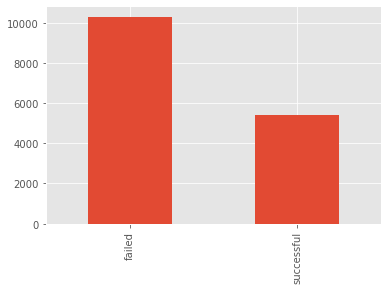

In [10]:
df1.state.value_counts().plot.bar()



In [11]:
df1.head(5)

,project_id,name,goal,pledged,state,disable_communication,country,currency,deadline,state_changed_at,...,created_at_day,created_at_yr,created_at_hr,launched_at_month,launched_at_day,launched_at_yr,launched_at_hr,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days
0,14042,Elysian Tuned Aperture Pickups for Electric Gu...,15000.0,4257.0,failed,False,US,USD,2015-04-05T12:42:40,2015-04-05T12:42:41,...,1,2015,10,3,6,2015,12,5,30,NaN
1,767,Linker,4000.0,51.0,failed,False,CA,CAD,2014-12-26T08:45:09,2014-12-26T08:45:25,...,28,2014,9,10,27,2014,8,59,60,NaN
2,2128,Making the Move--Edinburgh Fringe 2014,7750.0,7860.0,successful,False,US,USD,2014-08-19T11:00:00,2014-08-19T11:00:10,...,30,2014,2,7,31,2014,13,1,18,18.0
3,17449,Apple Usb Cable Protector,5000.0,1633.0,failed,False,FR,EUR,2015-10-18T16:00:20,2015-10-18T16:00:20,...,16,2015,12,8,19,2015,16,3,60,NaN
4,10959,Simple Work Attendance Sheet (S.work.a.S.),1300.0,16.0,failed,False,IT,EUR,2015-11-06T08:49:35,2015-11-06T08:49:35,...,15,2015,11,10,12,2015,8,26,25,NaN


In [12]:
# converting datetime objects for deadline, state_changed_at, created_at, launched_at

df1["deadline"]= pd.to_datetime(df1["deadline"])

df1["state_changed_at"]= pd.to_datetime(df1["state_changed_at"])

df1["created_at"]= pd.to_datetime(df1["created_at"])

df1["launched_at"]= pd.to_datetime(df1["launched_at"])


df1["launch_to_deadline"]= df1["deadline"]- df1["launched_at"]

df1["launch_to_deadline"]= df1["launch_to_deadline"].dt.round('d').dt.days


df1["creation_to_launch"]= df1["launched_at"] - df1["created_at"]
df1["creation_to_launch"] = df1["creation_to_launch"].dt.round('d').dt.days


df1["launch_year"] = df1["launched_at"].dt.year
df1["launch_month"] = df1["launched_at"].dt.month


df1["deadline_year"]= df1["launched_at"].dt.year
df1["deadline_month"]= df1["deadline"].dt.month






In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15685 entries, 0 to 18567
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   project_id                   15685 non-null  int64         
 1   name                         15685 non-null  object        
 2   goal                         15685 non-null  float64       
 3   pledged                      15685 non-null  float64       
 4   state                        15685 non-null  object        
 5   disable_communication        15685 non-null  bool          
 6   country                      15685 non-null  object        
 7   currency                     15685 non-null  object        
 8   deadline                     15685 non-null  datetime64[ns]
 9   state_changed_at             15685 non-null  datetime64[ns]
 10  created_at                   15685 non-null  datetime64[ns]
 11  launched_at                  15685 non-nu

In [14]:
df1.shape

(15685, 50)

In [15]:
df1.isnull().sum()

# category and launch_to_state_change_days contains na values but i noticed removing launch_to_state_change_days also removed failure observations from state column.


project_id                         0
name                               0
goal                               0
pledged                            0
state                              0
disable_communication              0
country                            0
currency                           0
deadline                           0
state_changed_at                   0
created_at                         0
launched_at                        0
staff_pick                         0
backers_count                      0
static_usd_rate                    0
usd_pledged                        0
category                        1471
spotlight                          0
name_len                           0
name_len_clean                     0
blurb_len                          0
blurb_len_clean                    0
deadline_weekday                   0
state_changed_at_weekday           0
created_at_weekday                 0
launched_at_weekday                0
deadline_month                     0
d

In [16]:
# drop na values from category column
df1.dropna(subset=["category"],inplace=True)

In [17]:
df1.isnull().sum()

project_id                        0
name                              0
goal                              0
pledged                           0
state                             0
disable_communication             0
country                           0
currency                          0
deadline                          0
state_changed_at                  0
created_at                        0
launched_at                       0
staff_pick                        0
backers_count                     0
static_usd_rate                   0
usd_pledged                       0
category                          0
spotlight                         0
name_len                          0
name_len_clean                    0
blurb_len                         0
blurb_len_clean                   0
deadline_weekday                  0
state_changed_at_weekday          0
created_at_weekday                0
launched_at_weekday               0
deadline_month                    0
deadline_day                

In [18]:
# check duplicates

x= len(df1[df1.duplicated(subset="project_id")])
print(f'there are {x} duplicated instances in the dataset')





there are 0 duplicated instances in the dataset


In [19]:
df1.state.value_counts()

failed        9535
successful    4679
Name: state, dtype: int64

## Exploratory Data Analysis

In [20]:
# converting the goal amount in USD amount to normailize

df1["usd_goal"]= round(df1["goal"]* df1["static_usd_rate"], 2)

<AxesSubplot:xlabel='creation_to_launch', ylabel='Count'>

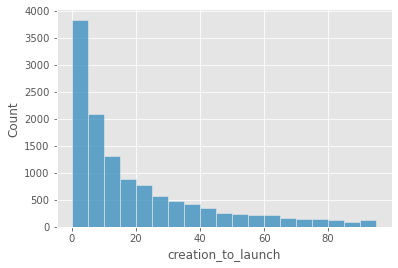

In [21]:
# comparing creation and launch dates

# the plot shows most projects get created and get launched right way
bins= [_*5 for _ in range(0,20)]
sns.histplot(df1.creation_to_launch, bins= bins)

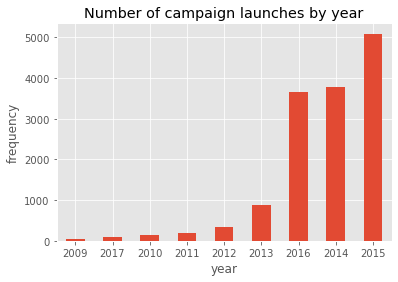

In [22]:
# examining campaign launch dates by year

plt.title("Number of campaign launches by year")
df1.launched_at_yr.value_counts(sort=True, ascending=True).plot(kind="bar",rot=0);
plt.xlabel('year');
plt.ylabel('frequency');

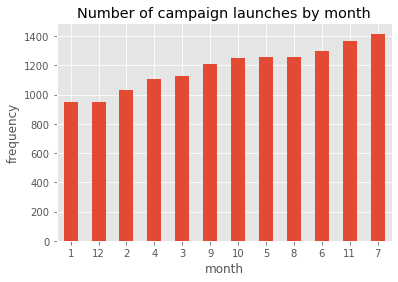

In [23]:
# examining campaign launch dates by month

plt.title("Number of campaign launches by month")
df1.launched_at_month.value_counts(sort=True, ascending=True).plot(kind="bar",rot=0);
plt.xlabel('month');
plt.ylabel('frequency');

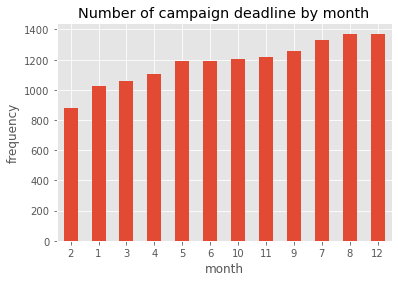

In [24]:
# examining campaign by deadline month
# month 8 and 12 had the highest number of deadline date, the campaign launched previous month and it make sense most projects are within one month

plt.title("Number of campaign deadline by month")
df1.deadline_month.value_counts(sort=True, ascending=True).plot(kind="bar",rot=0);
plt.xlabel('month');
plt.ylabel('frequency');

failed        0.670818
successful    0.329182
Name: state, dtype: float64


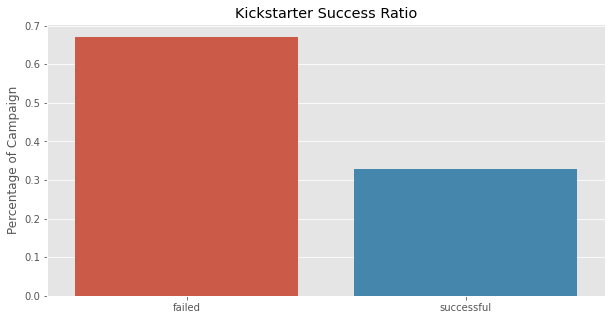

In [28]:
target = df1.state.value_counts(normalize=True) 
print(target)
plt.figure(figsize=(10,5))
sns.barplot(target.index, target.values)
plt.title('Kickstarter Success Ratio')
plt.ylabel('Percentage of Campaign', fontsize=12);

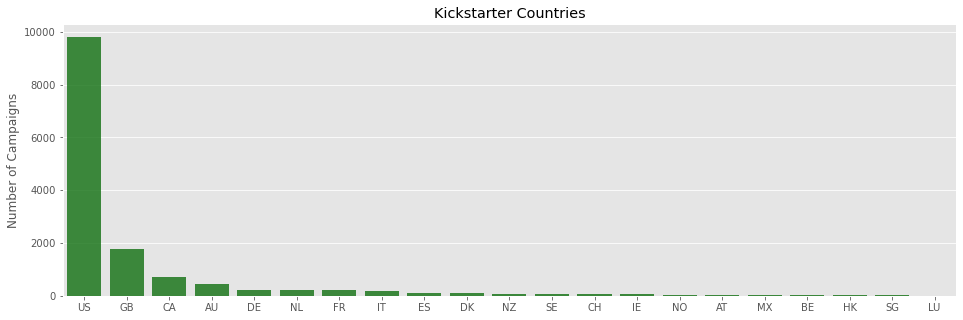

In [29]:
country_list = df1.country.value_counts()
plt.figure(figsize=(16,5))
sns.barplot(country_list.index, country_list.values, alpha=0.8, color= "green")
plt.title('Kickstarter Countries')
plt.ylabel('Number of Campaigns', fontsize=12);

# Feature Engineering

In [30]:
# dummify state
df1['state'] = df1.state.astype(str)
df1['success'] = np.where(df1.state == "successful", 1, 0)
df1.success.value_counts()


0    9535
1    4679
Name: success, dtype: int64

country
AT       6
AU      79
BE       2
CA     168
CH      18
DE      66
DK      16
ES      18
FR      51
GB     714
HK       8
IE      19
IT      12
LU       1
MX       9
NL      47
NO       7
NZ      19
SE      13
SG       5
US    3401
dtype: int64


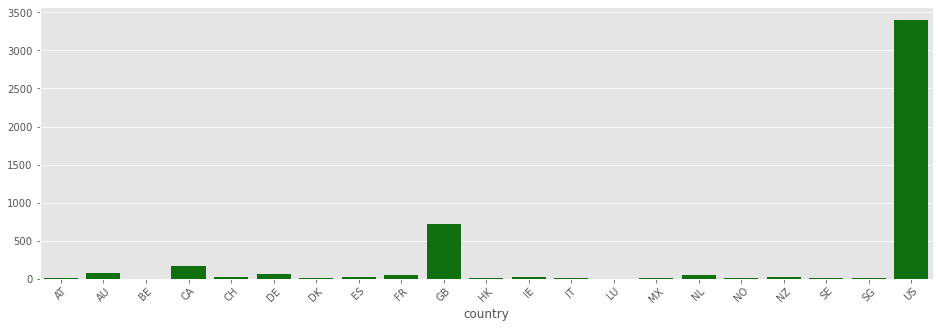

In [31]:

# which countries has the highest success rate
country_success = df1[df1.success == 1].groupby(['country']).size()
print(country_success)

plt.figure(figsize=(16,5))
sns.barplot(x=country_success.index, y=country_success.values, color="green")
plt.xticks(rotation=45);

country
AT      31
AU     363
BE      29
CA     556
CH      43
DE     171
DK      75
ES     106
FR     152
GB    1053
HK       8
IE      38
IT     154
LU       1
MX      22
NL     181
NO      34
NZ      57
SE      51
SG       7
US    6403
dtype: int64


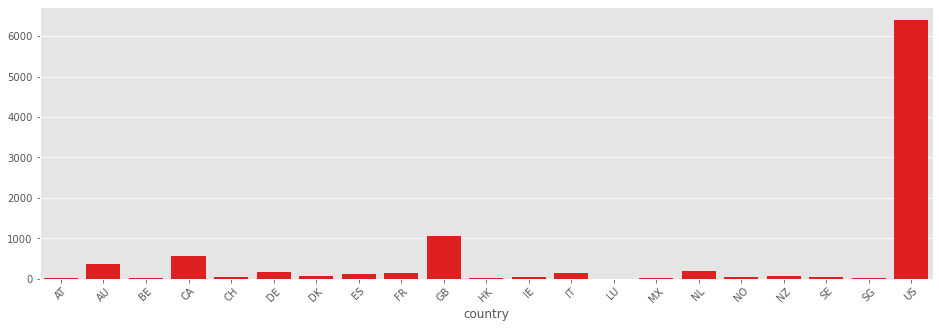

In [32]:
# which countries has the lowest success rate
country_fail = df1[df1.success == 0].groupby(['country']).size()
print(country_fail)

plt.figure(figsize=(16,5))
sns.barplot(x=country_fail.index, y=country_fail.values, color="red")
plt.xticks(rotation=45);

In [33]:
country_dict = {'AT':'OTHER', 'AU': 'OTHER', 'BE':'OTHER', 'CA': 'OTHER', 'CH':'OTHER', 'DE':'OTHER','DK':'OTHER', 'ES': 'OTHER', 'FR': 'OTHER',
 'GB': 'OTHER', 'HK': 'OTHER', 'IE':'OTHER','IT': 'OTHER','LU':'OTHER', 'MX': 'OTHER', 'NL': 'OTHER','NO':'OTHER','NZ':'OTHER', 'SE': 'OTHER','SG':'OTHER'}
df1 = df1.replace({"country": country_dict})


country
OTHER    1278
US       3401
dtype: int64


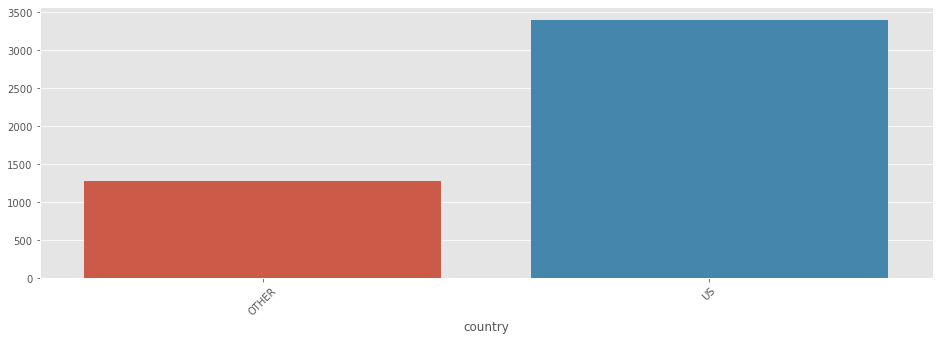

In [34]:
country_success = df1[df1.success == 1].groupby(['country']).size()
print(country_success)

plt.figure(figsize=(16,5))
sns.barplot(x=country_success.index, y=country_success.values)
plt.xticks(rotation=45);

In [35]:
# Make dummies
df1 = pd.get_dummies(columns=['country'], drop_first=True, data=df1)
df1.columns

Index(['project_id', 'name', 'goal', 'pledged', 'state',
       'disable_communication', 'currency', 'deadline', 'state_changed_at',
       'created_at', 'launched_at', 'staff_pick', 'backers_count',
       'static_usd_rate', 'usd_pledged', 'category', 'spotlight', 'name_len',
       'name_len_clean', 'blurb_len', 'blurb_len_clean', 'deadline_weekday',
       'state_changed_at_weekday', 'created_at_weekday', 'launched_at_weekday',
       'deadline_month', 'deadline_day', 'deadline_yr', 'deadline_hr',
       'state_changed_at_month', 'state_changed_at_day', 'state_changed_at_yr',
       'state_changed_at_hr', 'created_at_month', 'created_at_day',
       'created_at_yr', 'created_at_hr', 'launched_at_month',
       'launched_at_day', 'launched_at_yr', 'launched_at_hr',
       'create_to_launch_days', 'launch_to_deadline_days',
       'launch_to_state_change_days', 'launch_to_deadline',
       'creation_to_launch', 'launch_year', 'launch_month', 'deadline_year',
       'usd_goal', 'succes

In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14214 entries, 0 to 18565
Data columns (total 52 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   project_id                   14214 non-null  int64         
 1   name                         14214 non-null  object        
 2   goal                         14214 non-null  float64       
 3   pledged                      14214 non-null  float64       
 4   state                        14214 non-null  object        
 5   disable_communication        14214 non-null  bool          
 6   currency                     14214 non-null  object        
 7   deadline                     14214 non-null  datetime64[ns]
 8   state_changed_at             14214 non-null  datetime64[ns]
 9   created_at                   14214 non-null  datetime64[ns]
 10  launched_at                  14214 non-null  datetime64[ns]
 11  staff_pick                   14214 non-nu

category
Apps            273
Blues            17
Comedy            1
Experimental    164
Festivals       248
Flight           59
Gadgets         565
Hardware        987
Immersive       127
Makerspaces      59
Musical         363
Plays           606
Robots          163
Shorts           33
Software        294
Sound           190
Spaces           71
Wearables       259
Web             200
dtype: int64


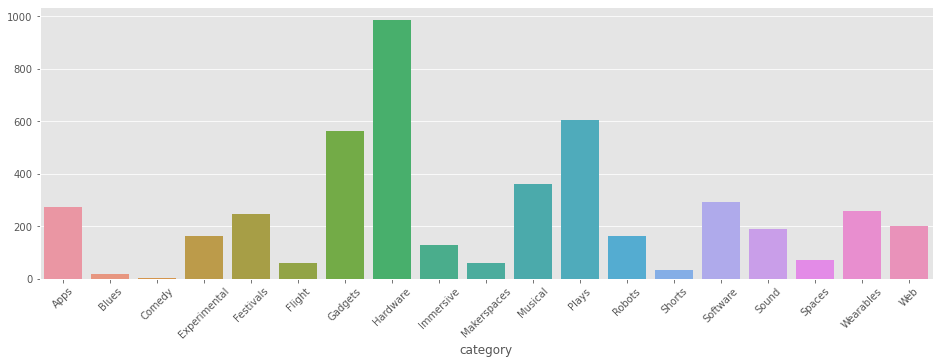

In [37]:
# main category + success
category_success = df1[df1.success == 1].groupby(['category']).size()
print(category_success)
plt.figure(figsize=(16,5))
sns.barplot(x=category_success.index, y=category_success.values)
plt.xticks(rotation=45);

In [38]:
# Make category dummies
df1 = pd.get_dummies(columns=['category'], drop_first=True, data=df1)
df1.columns

Index(['project_id', 'name', 'goal', 'pledged', 'state',
       'disable_communication', 'currency', 'deadline', 'state_changed_at',
       'created_at', 'launched_at', 'staff_pick', 'backers_count',
       'static_usd_rate', 'usd_pledged', 'spotlight', 'name_len',
       'name_len_clean', 'blurb_len', 'blurb_len_clean', 'deadline_weekday',
       'state_changed_at_weekday', 'created_at_weekday', 'launched_at_weekday',
       'deadline_month', 'deadline_day', 'deadline_yr', 'deadline_hr',
       'state_changed_at_month', 'state_changed_at_day', 'state_changed_at_yr',
       'state_changed_at_hr', 'created_at_month', 'created_at_day',
       'created_at_yr', 'created_at_hr', 'launched_at_month',
       'launched_at_day', 'launched_at_yr', 'launched_at_hr',
       'create_to_launch_days', 'launch_to_deadline_days',
       'launch_to_state_change_days', 'launch_to_deadline',
       'creation_to_launch', 'launch_year', 'launch_month', 'deadline_year',
       'usd_goal', 'success', 'country

In [39]:
# campaign duration, preparation duration
from datetime import datetime, date, timedelta

prep_date = df1.created_at.values
start_date = df1.launched_at.values
end_date = df1.deadline.values

df1['campaign_duration'] = pd.to_timedelta(end_date - start_date).days
df1['preparation_duration'] = pd.to_timedelta(start_date - prep_date).days

In [40]:
df1.head(4)

,project_id,name,goal,pledged,state,disable_communication,currency,deadline,state_changed_at,created_at,...,category_Shorts,category_Software,category_Sound,category_Spaces,category_Thrillers,category_Wearables,category_Web,category_Webseries,campaign_duration,preparation_duration
0,14042,Elysian Tuned Aperture Pickups for Electric Gu...,15000.0,4257.0,failed,False,USD,2015-04-05 12:42:40,2015-04-05 12:42:41,2015-03-01 10:36:46,...,0,0,0,0,0,0,0,0,30,5
1,767,Linker,4000.0,51.0,failed,False,CAD,2014-12-26 08:45:09,2014-12-26 08:45:25,2014-08-28 09:45:56,...,0,0,0,0,0,0,0,0,60,59
2,2128,Making the Move--Edinburgh Fringe 2014,7750.0,7860.0,successful,False,USD,2014-08-19 11:00:00,2014-08-19 11:00:10,2014-07-30 02:32:04,...,0,0,0,0,0,0,0,0,18,1
3,17449,Apple Usb Cable Protector,5000.0,1633.0,failed,False,EUR,2015-10-18 16:00:20,2015-10-18 16:00:20,2015-08-16 12:24:07,...,0,0,0,0,0,0,0,0,60,3


In [41]:
# spotlight and staff_pick
df1 = pd.get_dummies(columns = ['spotlight','staff_pick'], drop_first=True, data=df1)
df1.head(5)

,project_id,name,goal,pledged,state,disable_communication,currency,deadline,state_changed_at,created_at,...,category_Sound,category_Spaces,category_Thrillers,category_Wearables,category_Web,category_Webseries,campaign_duration,preparation_duration,spotlight_True,staff_pick_True
0,14042,Elysian Tuned Aperture Pickups for Electric Gu...,15000.0,4257.0,failed,False,USD,2015-04-05 12:42:40,2015-04-05 12:42:41,2015-03-01 10:36:46,...,0,0,0,0,0,0,30,5,0,0
1,767,Linker,4000.0,51.0,failed,False,CAD,2014-12-26 08:45:09,2014-12-26 08:45:25,2014-08-28 09:45:56,...,0,0,0,0,0,0,60,59,0,0
2,2128,Making the Move--Edinburgh Fringe 2014,7750.0,7860.0,successful,False,USD,2014-08-19 11:00:00,2014-08-19 11:00:10,2014-07-30 02:32:04,...,0,0,0,0,0,0,18,1,1,0
3,17449,Apple Usb Cable Protector,5000.0,1633.0,failed,False,EUR,2015-10-18 16:00:20,2015-10-18 16:00:20,2015-08-16 12:24:07,...,0,0,0,0,0,0,60,3,0,0
4,10959,Simple Work Attendance Sheet (S.work.a.S.),1300.0,16.0,failed,False,EUR,2015-11-06 08:49:35,2015-11-06 08:49:35,2015-09-15 11:36:44,...,0,0,0,0,0,0,25,26,0,0


In [42]:
ks= df1[["usd_goal","success","country_US","campaign_duration","preparation_duration","category_Apps",
         "category_Blues","category_Comedy","category_Experimental","category_Festivals","category_Flight","category_Gadgets",
         "category_Hardware","category_Immersive","category_Makerspaces","category_Musical",
         "category_Places","category_Plays","category_Robots","category_Shorts","category_Software",
         "category_Sound","category_Spaces","category_Thrillers","category_Wearables",
         "category_Web","category_Webseries"]]

ks.head()


,usd_goal,success,country_US,campaign_duration,preparation_duration,category_Apps,category_Blues,category_Comedy,category_Experimental,category_Festivals,...,category_Plays,category_Robots,category_Shorts,category_Software,category_Sound,category_Spaces,category_Thrillers,category_Wearables,category_Web,category_Webseries
0,15000.00,0,1,30,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3560.19,0,0,60,59,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7750.00,1,1,18,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,5539.05,0,0,60,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1476.66,0,0,25,26,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [43]:
ks.shape

(14214, 27)

In [44]:
ks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14214 entries, 0 to 18565
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   usd_goal               14214 non-null  float64
 1   success                14214 non-null  int64  
 2   country_US             14214 non-null  uint8  
 3   campaign_duration      14214 non-null  int64  
 4   preparation_duration   14214 non-null  int64  
 5   category_Apps          14214 non-null  uint8  
 6   category_Blues         14214 non-null  uint8  
 7   category_Comedy        14214 non-null  uint8  
 8   category_Experimental  14214 non-null  uint8  
 9   category_Festivals     14214 non-null  uint8  
 10  category_Flight        14214 non-null  uint8  
 11  category_Gadgets       14214 non-null  uint8  
 12  category_Hardware      14214 non-null  uint8  
 13  category_Immersive     14214 non-null  uint8  
 14  category_Makerspaces   14214 non-null  uint8  
 15  ca

## Build The Classification Model

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import roc_curve, auc

In [46]:
# baseline
subset_1= ks.loc[:,["success","usd_goal","country_US","campaign_duration"]]

subset_1.head()

,success,usd_goal,country_US,campaign_duration
0,0,15000.00,1,30
1,0,3560.19,0,60
2,1,7750.00,1,18
3,0,5539.05,0,60
4,0,1476.66,0,25


# Logistic regression Model

In [47]:
# define x and y

X, y = subset_1.drop(['success'], axis=1), subset_1.success

# split the data and standarize

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [48]:
# build logistic regression model and predict

lr = LogisticRegression()
lr.fit(X_train_sc, y_train)
lr_pred = lr.predict(X_test_sc)

In [49]:
# evaluate the model
lr_ac = lr.score(X_test_sc, y_test)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)

lr_y_score = lr.predict_proba(X_test_sc)[:,1]
lr_fpr, lr_tpr, lr_auc_thresholds = roc_curve(y_test, lr_y_score)
roc_auc_lr = auc(lr_fpr, lr_tpr)


print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80      1908
           1       0.50      0.00      0.00       935

    accuracy                           0.67      2843
   macro avg       0.59      0.50      0.40      2843
weighted avg       0.61      0.67      0.54      2843



In [46]:
print('Logistic Regression validation metrics with subset 1: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f \n ROC: %.4f' %
        (lr_ac, 
         lr_precision, 
         lr_recall,
         lr_f1,
         roc_auc_lr)
     )

Logistic Regression validation metrics with subset 1: 
 Accuracy: 0.6711 
 Precision: 0.5000 
 Recall: 0.0011 
 F1: 0.0021 
 ROC: 0.6373


In [50]:
# baseline 2
subset_2= ks.loc[:,["success","usd_goal","country_US","campaign_duration","preparation_duration"]]

subset_2.head()

,success,usd_goal,country_US,campaign_duration,preparation_duration
0,0,15000.00,1,30,5
1,0,3560.19,0,60,59
2,1,7750.00,1,18,1
3,0,5539.05,0,60,3
4,0,1476.66,0,25,26


In [51]:
# define x and y

x2, y2 = subset_2.drop(['success'], axis=1), subset_2.success

# split the data and standarize

X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size=0.2, random_state=5)

scaler = StandardScaler()
X_train_sc2 = scaler.fit_transform(X_train)
X_test_sc2 = scaler.transform(X_test)

In [52]:
# build the model and predict
lr2 = LogisticRegression(C=1000) #small regularization applied 
lr2.fit(X_train_sc2, y_train)
lr2_pred = lr2.predict(X_test_sc2)


In [53]:
# evaluate the model

lr2_confusion = confusion_matrix(y_test, lr2_pred)

lr2_ac = lr2.score(X_test_sc2, y_test)
lr2_precision = precision_score(y_test, lr2_pred)
lr2_recall = recall_score(y_test, lr2_pred)
lr2_f1 = f1_score(y_test, lr2_pred)

lr2_y_score = lr2.predict_proba(X_test_sc2)[:,1]
lr2_fpr, lr2_tpr, lr2_auc_thresholds = roc_curve(y_test, lr2_y_score)
roc_auc_lr2 = auc(lr2_fpr, lr2_tpr)

print(classification_report(y_test, lr2_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80      1908
           1       0.53      0.01      0.02       935

    accuracy                           0.67      2843
   macro avg       0.60      0.50      0.41      2843
weighted avg       0.63      0.67      0.54      2843



In [54]:
print('Logistic Regression validation metrics with subset 2: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f \n ROC: %.4f' %
        (lr2_ac, 
         lr2_precision, 
         lr2_recall,
         lr2_f1,
         roc_auc_lr2)
     )

Logistic Regression validation metrics with subset 2: 
 Accuracy: 0.6715 
 Precision: 0.5294 
 Recall: 0.0096 
 F1: 0.0189 
 ROC: 0.6458


In [55]:
# all features (ks)
x3, y3 = ks.drop(['success'], axis=1), ks.success

X_train, X_test, y_train, y_test = train_test_split(x3, y3, test_size=0.2, random_state=5)

scaler = StandardScaler()
X_train_sc3 = scaler.fit_transform(X_train)
X_test_sc3 = scaler.transform(X_test)


In [56]:
lr3 = LogisticRegression(C=0.001) # with regularization
lr3.fit(X_train_sc3, y_train)
lr3_pred = lr3.predict(X_test_sc3)
lr3_confusion = confusion_matrix(y_test, lr3_pred)

lr3_ac = lr3.score(X_test_sc3, y_test)
lr3_precision = precision_score(y_test, lr3_pred)
lr3_recall = recall_score(y_test, lr3_pred)
lr3_f1 = f1_score(y_test, lr3_pred)

lr3_y_score = lr3.predict_proba(X_test_sc3)[:,1]
lr3_fpr, lr3_tpr, lr3_auc_thresholds = roc_curve(y_test, lr3_y_score)
roc_auc_lr3 = auc(lr3_fpr, lr3_tpr)

print(classification_report(y_test, lr3_pred))

              precision    recall  f1-score   support

           0       0.72      0.92      0.81      1908
           1       0.61      0.27      0.37       935

    accuracy                           0.70      2843
   macro avg       0.67      0.59      0.59      2843
weighted avg       0.68      0.70      0.66      2843



In [57]:
# accuracy has improved greatly but the f1 score not satisfactory 
print('Logistic Regression validation metrics with full dataset: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f \n ROC: %.4f' %
        (lr3_ac, 
         lr3_precision, 
         lr3_recall,
         lr3_f1,
         roc_auc_lr3)
     )

Logistic Regression validation metrics with full dataset: 
 Accuracy: 0.7031 
 Precision: 0.6123 
 Recall: 0.2652 
 F1: 0.3701 
 ROC: 0.7251


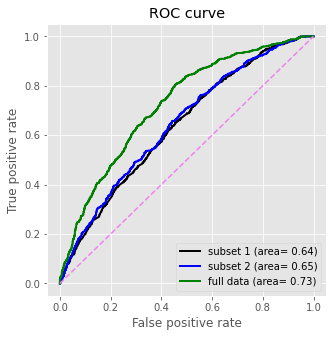

In [58]:
plt.figure(figsize=(5,5))
lw = 2
plt.plot(lr_fpr, lr_tpr, color='black', lw=lw, 
         label='subset 1 (area= %0.2f)' %roc_auc_lr)
plt.plot(lr2_fpr, lr2_tpr, color='blue', lw=lw, 
         label='subset 2 (area= %0.2f)' %roc_auc_lr2)
plt.plot(lr3_fpr, lr3_tpr, color='green', lw=lw, 
         label='full data (area= %0.2f)' %roc_auc_lr3)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right');

# hyperparameter tuning logistic regression




In [59]:
from sklearn.model_selection import GridSearchCV


In [60]:
# define x and y
X4, Y4 = ks.drop(['success'], axis=1), ks.success
# split into train and test set
X_mid, X_test, y_mid, y_test = train_test_split(X4, Y4, test_size=0.2, random_state=5)
X_train, X_val, y_train, y_val = train_test_split(X_mid, y_mid, test_size=0.2, random_state=5)

In [61]:
# standarize the x values
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_val_sc = scaler.transform(X_val)

In [62]:
# build a model
lr = LogisticRegression()
lr.fit(X_train_sc, y_train)
lr_pred = lr.predict(X_val_sc)
lr_confusion = confusion_matrix(y_val, lr_pred)

lr_ac = lr.score(X_val_sc, y_val)
lr_precision = precision_score(y_val, lr_pred)
lr_recall = recall_score(y_val, lr_pred)
lr_f1 = f1_score(y_val, lr_pred)

print(classification_report(y_val, lr_pred))


              precision    recall  f1-score   support

           0       0.74      0.88      0.81      1508
           1       0.63      0.40      0.49       767

    accuracy                           0.72      2275
   macro avg       0.69      0.64      0.65      2275
weighted avg       0.71      0.72      0.70      2275



In [63]:
# logistic regression grid search to improve precision, and F1 score
penalty = ['l1', 'l2']
C = [0.001,0.01,0.1,1,10,100,1000]
param_grid = dict(C=C, penalty=penalty)
lr_grid_search = LogisticRegression()
lr_grid = GridSearchCV(lr_grid_search, param_grid, cv=5, scoring='f1', verbose=2, n_jobs=-1, refit = True)
lr_grid.fit(X_train_sc, y_train)
lr_grid_preds = lr_grid.predict(X_val_sc)

lr_grid_best_params = lr_grid.best_params_
lr_grid_best_estimator = lr_grid.best_estimator_
lr_grid_best_cm = confusion_matrix(y_val,lr_grid_preds)
lr_grid_best_cr = classification_report(y_val,lr_grid_preds)
print(lr_grid_best_params, lr_grid_best_estimator, lr_grid_best_cm, lr_grid_best_cr)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
{'C': 1000, 'penalty': 'l2'} LogisticRegression(C=1000) [[1306  202]
 [ 418  349]]               precision    recall  f1-score   support

           0       0.76      0.87      0.81      1508
           1       0.63      0.46      0.53       767

    accuracy                           0.73      2275
   macro avg       0.70      0.66      0.67      2275
weighted avg       0.72      0.73      0.71      2275



In [64]:
# better result seen with hyperparameter tuning for f1 score
print( "logistic regression with hyperparameter: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f" %
        (lr_ac, 
         lr_precision, 
         lr_recall,
         lr_f1)
     )

logistic regression with hyperparameter: 
 Accuracy: 0.7196 
 Precision: 0.6341 
 Recall: 0.3977 
 F1: 0.4888


In [65]:
### extra classification analysis was done using random forest

## random forest

In [66]:
from sklearn.ensemble import RandomForestClassifier


In [67]:
# define x and y
X5, Y5 = ks.drop(['success'], axis=1), ks.success
# split into train/test set
X_train, X_test, y_train, y_test = train_test_split(X5, Y5, test_size=0.2, random_state=5)
# standarize
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [68]:
#Build Random forest model
rf = RandomForestClassifier()
rf.fit(X_train_sc, y_train)
rf_pred = rf.predict(X_test_sc)
rf_confusion = confusion_matrix(y_test, rf_pred)

rf_ac = rf.score(X_test_sc, y_test)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      1908
           1       0.56      0.49      0.53       935

    accuracy                           0.71      2843
   macro avg       0.66      0.65      0.66      2843
weighted avg       0.70      0.71      0.70      2843



In [69]:
print('Random Forest validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (rf_ac, 
         rf_precision, 
         rf_recall,
         rf_f1)
     )

Random Forest validation metrics: 
 Accuracy: 0.7070 
 Precision: 0.5620 
 Recall: 0.4941 
 F1: 0.5259


## Clustering model

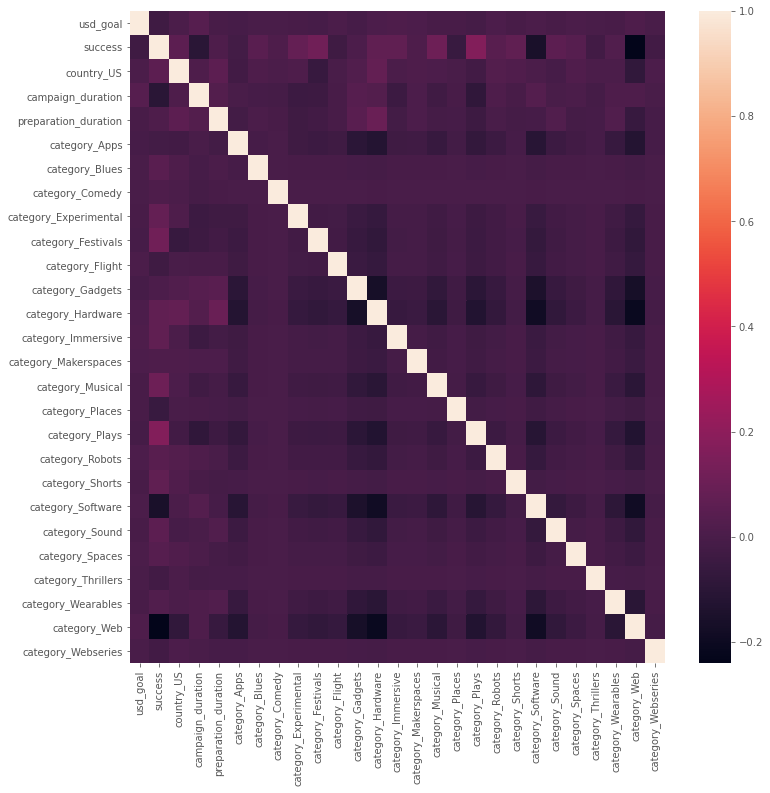

In [70]:
fig_dims = (12, 12)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(ks.corr());

# PCA analysis

In [71]:
X_pca= ks.drop(['success'], axis=1)
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

X_pca_scaler= scale(X_pca)



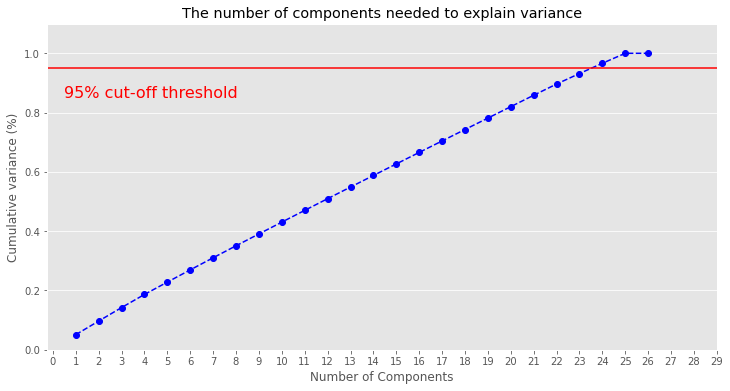

In [72]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_pca_scaler)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 27, step=1)
y = np.cumsum(pca.explained_variance_ratio_)
plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 30, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [73]:
# elbow method to determine the optimal k value

In [74]:
# define x and remove the target variable
X= ks.drop(['success'], axis=1)

Text(0.5, 0, 'Number of clusters')

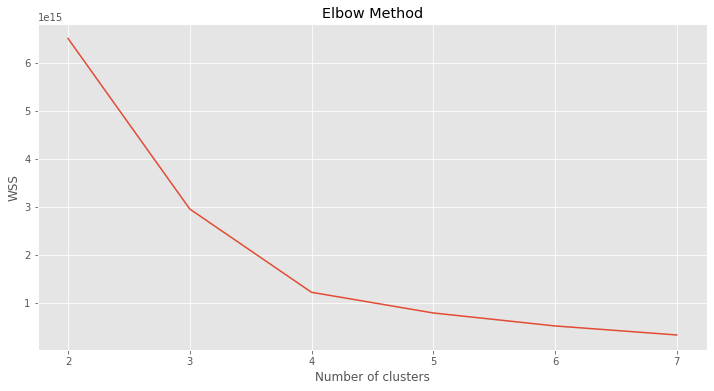

In [75]:
from sklearn.cluster import KMeans
wss=[]# within clusters sum of errors
for i in range(2,8):
  kmeans= KMeans(n_clusters=i)
  model= kmeans.fit(X)
  wss.append(model.inertia_)

from matplotlib import pyplot
pyplot.plot([2,3,4,5,6,7],wss)
pyplot.title("Elbow Method")
pyplot.ylabel("WSS")
pyplot.xlabel("Number of clusters")



from this graph, the optimal cluster should be 4

In [76]:
## lets use data from the orginal data

In [77]:
# examine the categories
X_cluster2= df1[["pledged","backers_count"]]

# standarize the x value
X_cluster2sc= scaler.fit_transform(X_cluster2)

In [78]:
# k-mean model

kmeans= KMeans(n_clusters=4, random_state=0)
kmeans.fit(X_cluster2sc)

KMeans(n_clusters=4, random_state=0)

In [79]:
kmeans= KMeans(n_clusters=4)
model= kmeans.fit(X_cluster2sc)
labels= model.predict(X_cluster2sc)


Text(0, 0.5, 'backers_count')

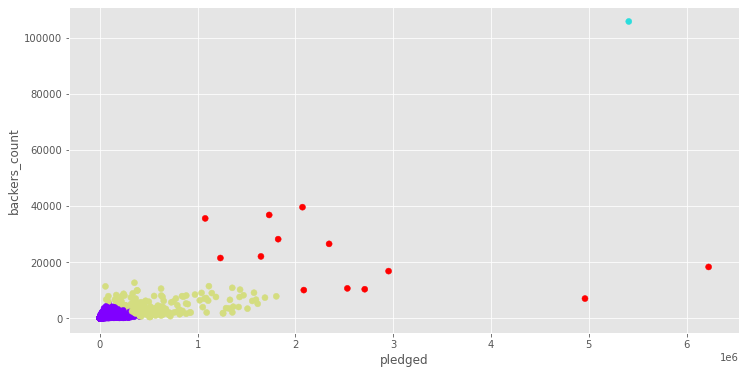

In [80]:
# plot the graph
from matplotlib import pyplot
pyplot.scatter(df1.pledged,df1.backers_count, c=labels, cmap= "rainbow")

pyplot.xlabel("pledged")
pyplot.ylabel("backers_count")


